Лабораторная работа #2 Бочарова Алексея. Ноутбук размещен на гитхабе https://github.com/murzik2020ai/algo


In [1]:
import numpy as np
import pandas as pd
import time
import random
import seaborn as sns  #for plots
import matplotlib.pyplot as plt
import scipy
import math
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics as m
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
# подключаем гугл диск на котором данные
from google.colab import drive
drive.mount ('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [3]:
!ls /content/gdrive/'My Drive'/raifhack/data

test.csv  test_submission.csv  train.csv


In [5]:
PATH_TO_DATA = "../content/gdrive/My Drive/raifhack/data/"

In [49]:
#загружаем данные
train_df = pd.read_csv(PATH_TO_DATA+'train.csv')
train_df.tail(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type
279790,Кемерово,1.0,COL_280529,55.360680,86.081460,5,57,100,134,0,0,0,0,1,16,32,41,0.844577,Кемерово,558662.0,0.341931,0,10,12,20,1,3,5,7,1,4,6,7,1,3,3,1,7,9,0,0,1,1,4,7,0,2,9,12,1,23,32,48,200.109079,2.073608,0,0,0,0.385545,3,14,18,38755.038322,94,24,1649.0,429.0,4.691489,4.125000,1957.425532,1954.625000,Кемеровская область,89.201305,S17667,2020-08-23,110,1
279791,Киров,1.0,COL_280637,58.592915,49.677439,1,23,64,113,0,0,0,0,0,1,11,25,1.317512,Киров,496986.0,0.126115,0,6,18,48,0,0,0,1,0,6,9,12,3,4,5,0,1,2,1,1,3,1,1,4,0,0,4,7,1,10,37,61,306.460323,1.998461,0,0,0,0.148057,4,12,19,41335.014762,249,79,2735.0,766.0,5.069124,4.776119,1972.599078,1971.794118,Кировская область,172.855871,S5611,2020-08-23,110,1


In [7]:
#смотрим размерность данный, 279 ТЫС. СТРОК, 77 СТОЛБЦОВ
train_df.shape

(279792, 77)

In [8]:
#смотрим названия колонок
train_df.columns

Index(['city', 'floor', 'id', 'lat', 'lng', 'osm_amenity_points_in_0.001',
       'osm_amenity_points_in_0.005', 'osm_amenity_points_in_0.0075',
       'osm_amenity_points_in_0.01', 'osm_building_points_in_0.001',
       'osm_building_points_in_0.005', 'osm_building_points_in_0.0075',
       'osm_building_points_in_0.01', 'osm_catering_points_in_0.001',
       'osm_catering_points_in_0.005', 'osm_catering_points_in_0.0075',
       'osm_catering_points_in_0.01', 'osm_city_closest_dist',
       'osm_city_nearest_name', 'osm_city_nearest_population',
       'osm_crossing_closest_dist', 'osm_crossing_points_in_0.001',
       'osm_crossing_points_in_0.005', 'osm_crossing_points_in_0.0075',
       'osm_crossing_points_in_0.01', 'osm_culture_points_in_0.001',
       'osm_culture_points_in_0.005', 'osm_culture_points_in_0.0075',
       'osm_culture_points_in_0.01', 'osm_finance_points_in_0.001',
       'osm_finance_points_in_0.005', 'osm_finance_points_in_0.0075',
       'osm_finance_points_in

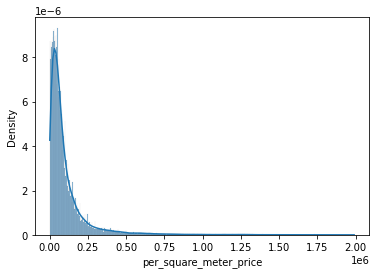

In [22]:
sns.histplot(train_df['per_square_meter_price'],stat='density',kde=True)

In [26]:
train_df['per_square_meter_price'].describe()

count    2.797920e+05
mean     1.101955e+05
std      1.720506e+05
min      3.896104e+02
25%      2.970149e+04
50%      5.971068e+04
75%      1.193000e+05
max      1.990000e+06
Name: per_square_meter_price, dtype: float64

In [27]:
discrete_columns = ['osm_city_nearest_name','region','realty_type']

In [36]:
numerical_columns = ['reform_count_of_houses_1000',
                     'osm_healthcare_points_in_0.0075',
                     'per_square_meter_price']

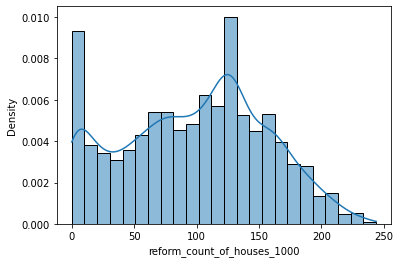

reform_count_of_houses_1000 Пермь 98.12099494097808
reform_count_of_houses_1000 Пермь 3309.34876663237


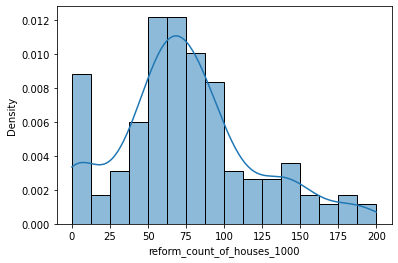

reform_count_of_houses_1000 Орехово-Зуево 74.78507462686566
reform_count_of_houses_1000 Орехово-Зуево 1991.7269414123386


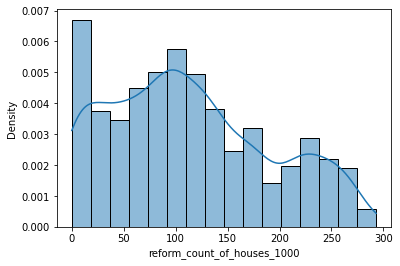

reform_count_of_houses_1000 Ярославль 113.26307099614749
reform_count_of_houses_1000 Ярославль 5954.331454080269


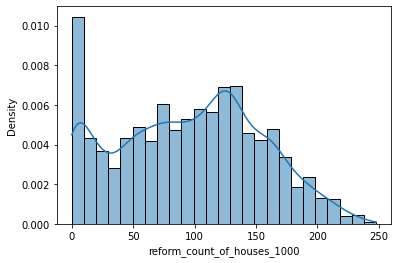

reform_count_of_houses_1000 Пермский край 95.4198682766191
reform_count_of_houses_1000 Пермский край 3441.463483773344


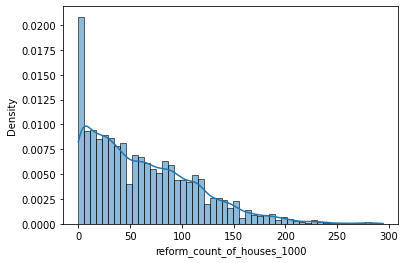

reform_count_of_houses_1000 Московская область 62.301139147476725
reform_count_of_houses_1000 Московская область 2681.182281896831


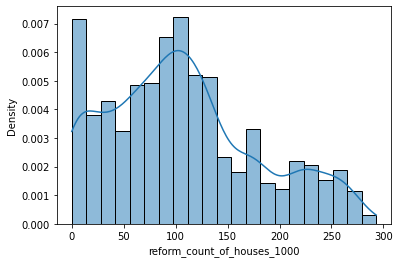

reform_count_of_houses_1000 Ярославская область 107.07702349869452
reform_count_of_houses_1000 Ярославская область 5262.057165727042


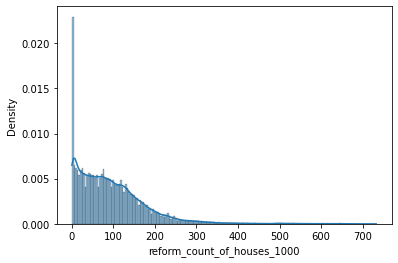

reform_count_of_houses_1000 10 94.43627801540931
reform_count_of_houses_1000 10 7112.284246914673


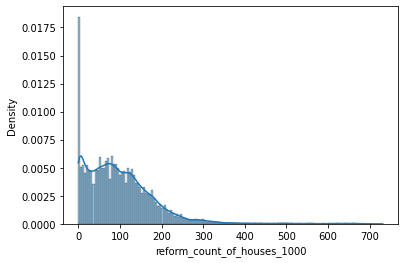

reform_count_of_houses_1000 110 99.92134377231872
reform_count_of_houses_1000 110 7221.098652233451


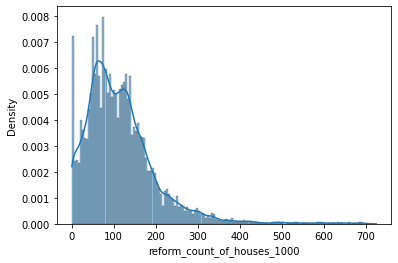

reform_count_of_houses_1000 100 116.69151514094942
reform_count_of_houses_1000 100 7569.8788089538875


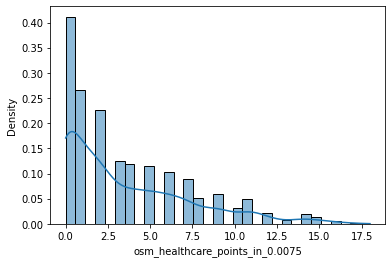

osm_healthcare_points_in_0.0075 Пермь 3.610033726812816
osm_healthcare_points_in_0.0075 Пермь 14.01698195501773


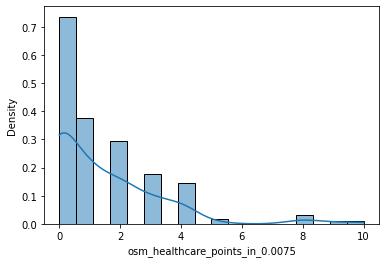

osm_healthcare_points_in_0.0075 Орехово-Зуево 1.4567164179104477
osm_healthcare_points_in_0.0075 Орехово-Зуево 3.370514591222987


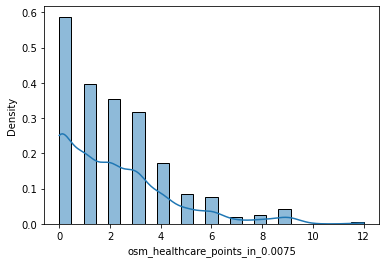

osm_healthcare_points_in_0.0075 Ярославль 2.1271326362135388
osm_healthcare_points_in_0.0075 Ярославль 4.711960572941498


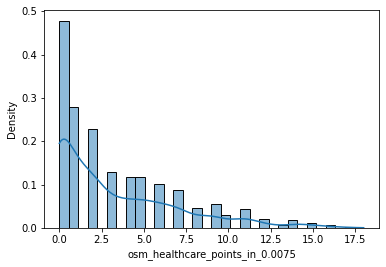

osm_healthcare_points_in_0.0075 Пермский край 3.3476033662641784
osm_healthcare_points_in_0.0075 Пермский край 13.22165269010234


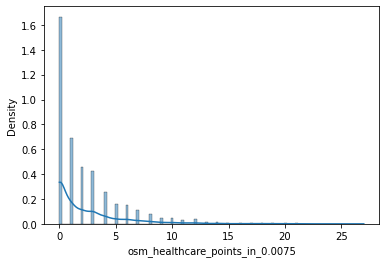

osm_healthcare_points_in_0.0075 Московская область 2.405438510534052
osm_healthcare_points_in_0.0075 Московская область 11.661562779292131


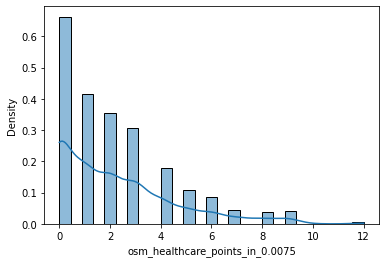

osm_healthcare_points_in_0.0075 Ярославская область 2.185378590078329
osm_healthcare_points_in_0.0075 Ярославская область 5.171901096878534


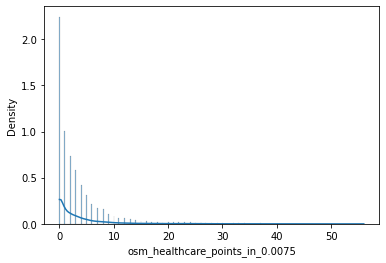

osm_healthcare_points_in_0.0075 10 3.667640431245024
osm_healthcare_points_in_0.0075 10 36.26749045735667


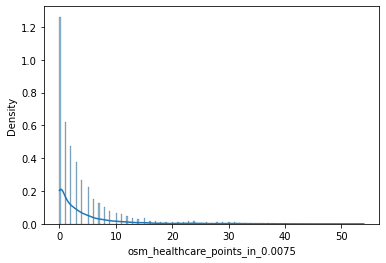

osm_healthcare_points_in_0.0075 110 4.234944548504898
osm_healthcare_points_in_0.0075 110 42.668230831810064


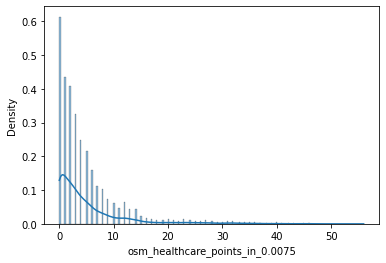

osm_healthcare_points_in_0.0075 100 5.299715834800648
osm_healthcare_points_in_0.0075 100 50.76754738180418


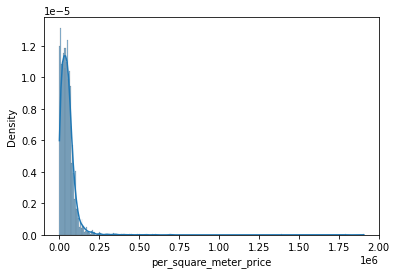

per_square_meter_price Пермь 51692.21673832147
per_square_meter_price Пермь 3906358315.6781716


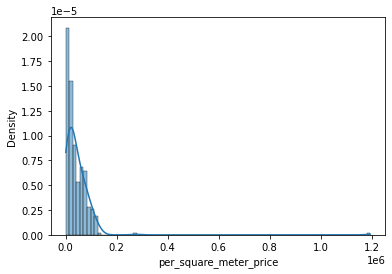

per_square_meter_price Орехово-Зуево 42422.02043699963
per_square_meter_price Орехово-Зуево 5146192778.166932


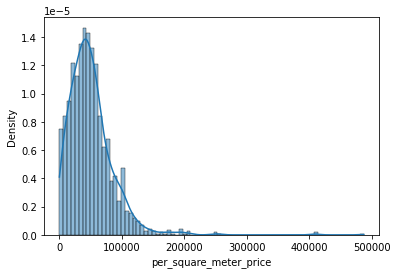

per_square_meter_price Ярославль 50752.54607585505
per_square_meter_price Ярославль 1345872731.2399497


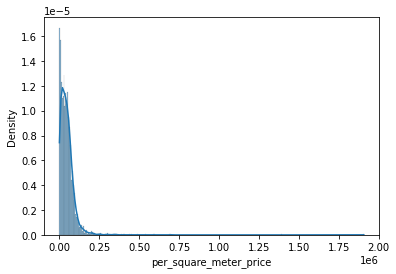

per_square_meter_price Пермский край 47830.24644579476
per_square_meter_price Пермский край 3548754950.0154686


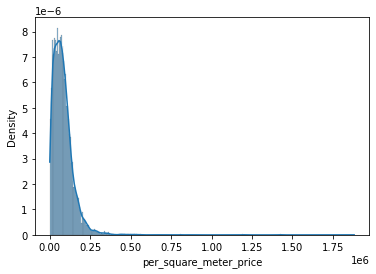

per_square_meter_price Московская область 82125.09677983396
per_square_meter_price Московская область 5482949591.366574


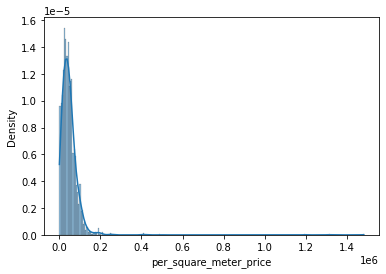

per_square_meter_price Ярославская область 48571.44186383597
per_square_meter_price Ярославская область 3407625885.289765


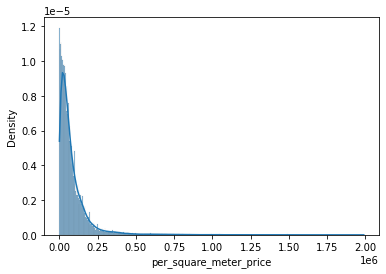

per_square_meter_price 10 88270.44675147311
per_square_meter_price 10 18418419619.01247


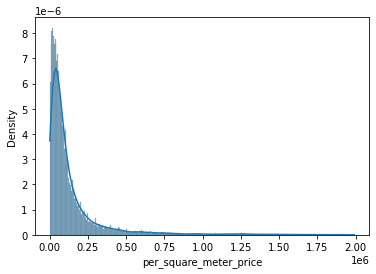

per_square_meter_price 110 143089.38325768904
per_square_meter_price 110 51690295006.12536


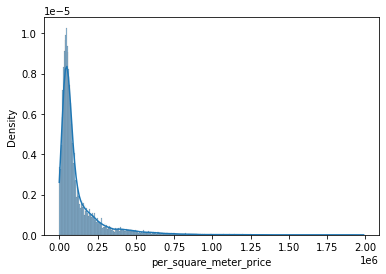

per_square_meter_price 100 124294.70499087674
per_square_meter_price 100 27080374533.351944


In [37]:
for n in numerical_columns:
  for d in discrete_columns:
    #count_columns = list(train_df[discrete_columns].nunique())
    for i in range(3):
      data = train_df[train_df[d] == train_df[d].unique()[i]]
      sns.histplot(data[n],stat='density',kde=True)
      plt.show()
      print(n,train_df[d].unique()[i],np.mean(data[n]))
      print(n,train_df[d].unique()[i],np.var(data[n]))

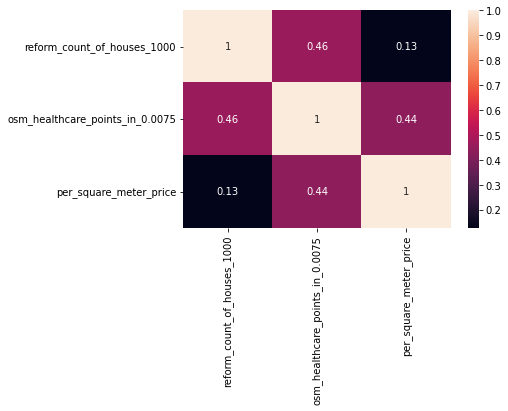

In [38]:
#heatmap
sns.heatmap(train_df[numerical_columns].corr(),annot=True)

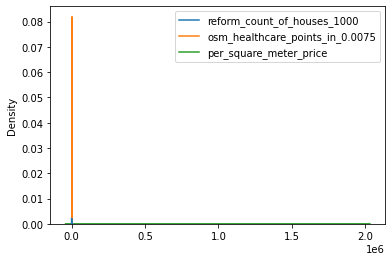

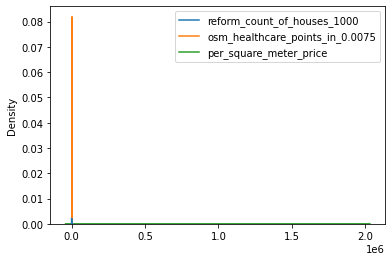

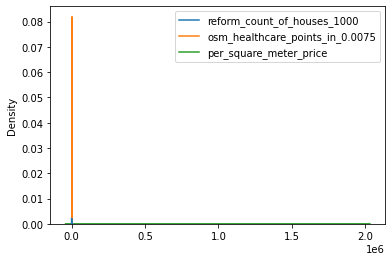

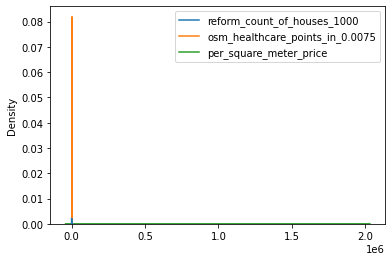

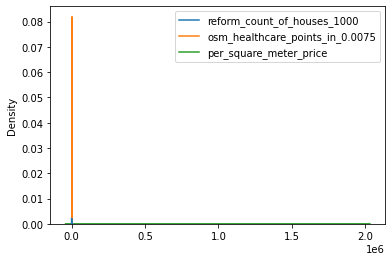

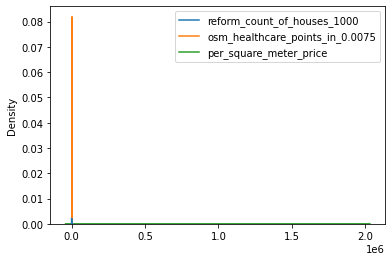

In [40]:
for n in numerical_columns:
  for n1 in numerical_columns:
    if n != n1:
      sns.kdeplot(data=train_df[numerical_columns])
      plt.show()

In [41]:
#ковариации
train_df[numerical_columns].corr()

,reform_count_of_houses_1000,osm_healthcare_points_in_0.0075,per_square_meter_price
reform_count_of_houses_1000,1.000000,0.463439,0.126935
osm_healthcare_points_in_0.0075,0.463439,1.000000,0.440013
per_square_meter_price,0.126935,0.440013,1.000000


In [43]:
data_dummies = pd.get_dummies(train_df[discrete_columns])

In [44]:
X_train, X_val, y_train, y_val = train_test_split(
    data_dummies,
    train_df['per_square_meter_price'],
    test_size = 0.2,
    random_state = 42
)

In [45]:
regr = LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [46]:
y_pred = regr.predict(X_val)
y_pred[:5]

array([ 76298.83500163,  65173.59302437, 360136.7389392 , 357486.81793705,
        55254.65340892])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


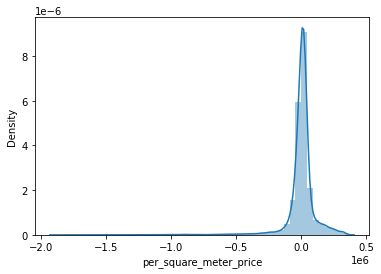

In [48]:
#graf of difference
balance = y_pred - y_val
sns.distplot(balance,kde=True)